In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline


In [2]:
df_BL = pd.read_csv("data/brendan-spotify.csv")
df_NL = pd.read_csv("data/nick-spotify.csv")
df_BT = pd.read_csv("data/btam-spotify.csv")
df_DD = pd.read_csv("data/danica-spotify.csv")
df_TLC = pd.read_csv("data/toma-spotify.csv")

print("song data read successfully!")

song data read successfully!


In [3]:
# Clean and/or merging data
# df_BL = df_BL.drop(columns=['added'])
# df_NL = df_NL.drop(columns=['added'])
# df_BT = df_BT.drop(columns=['added'])
# df_DD = df_DD.drop(columns=['added'])
# df_TLC = df_TLC.drop(columns=['added'])

frames = [df_BL, df_NL, df_BT, df_DD, df_TLC]

df = pd.concat(frames).drop_duplicates().reset_index(drop=True) 
df = df.drop_duplicates(subset=['Song','Artist'], keep='first', inplace=False, ignore_index=False )

## Trying to create group profile centred playlists using the following methods

In [4]:
def PrintCombinedMeanPlaylist(frames, playlistLen):
    """
    frames: list of the df containing indvidiual song libraries
    playlistLen: Length of the desired playlist
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the datasets drop any duplicates
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    # Calculate required values
    num_songs = len(df)
    means = df.mean(axis = 0, skipna = True) 
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - means['energy']) * 0.25
                       + abs(x['dance'] - means['dance']) * 0.25
                       + abs(x['liveliness'] - means['liveliness']) * 0.25
                       + abs(x['valence'] - means['valence']) * 0.25
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])
      
def PrintCombinedMedianPlaylist(frames, playlistLen):
    """
    frames: list of the df containing indvidiual song libraries
    playlistLen: Length of the desired playlist
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the datasets drop any duplicates
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    # Calculate required values
    num_songs = len(df)
    medians = df.median(axis = 0, skipna = True) 
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - medians['energy']) * 0.25
                       + abs(x['dance'] - medians['dance']) * 0.25
                       + abs(x['liveliness'] - medians['liveliness']) * 0.25
                       + abs(x['valence'] - medians['valence']) * 0.25
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

## Way to try make mood based group playlists

In [33]:
def MoodBasedPlaylist(frames, playlistLen, moodProfile, weightParams):
    """
    frames: list of the df containing individual song libraries
    playlistLen: Length of the desired playlist output
    moodProfile: List [energy, dance, liveliness, valence, popularity] providing the mood desired
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the 
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    df = df.drop_duplicates(subset=['Song','Artist'], keep='first', inplace=False, ignore_index=False )
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - moodProfile[0]) * weightParams[0]
                       + abs(x['dance'] - moodProfile[1]) * weightParams[1]
                       + abs(x['valence'] - moodProfile[2]) * weightParams[2]
                       + abs(x['popularity']- moodProfile[3]) * weightParams[3]
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

def PartyPlaylist(frames, playlistLen, moodProfile, weightParams):
    """
    frames: list of the df containing individual song libraries
    playlistLen: Length of the desired playlist output
    moodProfile: List [energy, dance, liveliness, valence, popularity] providing the mood desired
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the 
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    df = df.drop_duplicates(subset=['Song','Artist'], keep='first', inplace=False, ignore_index=False )
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - moodProfile[0]) * weightParams[0]
                       + abs(x['dance'] - moodProfile[1]) * weightParams[1]
                       + abs(x['valence'] - moodProfile[2]) * weightParams[2]
                       + abs(x['popularity']- moodProfile[3]) * weightParams[3]
                  )
    party_df = df.loc[df['Genre'] == ('dance pop' or 'big room' or 'edm' or 'hip hop' or 'house' or 'bass trap')]
    
    return (party_df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

Some basic information that can help you derive useful parameters for the algorithms

All genres occuring at least 40 times
dance pop               472
indie pop               175
big room                149
album rock              142
electropop              140
contemporary country    135
alternative r&b         116
pop                      98
modern rock              96
folk-pop                 87
bedroom pop              71
edm                      70
canadian pop             50
Name: Genre, dtype: int64


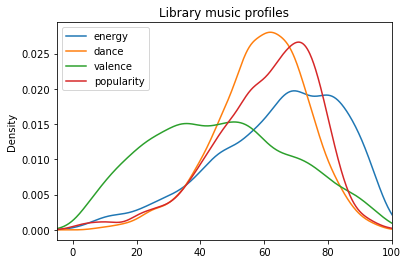

In [6]:
frames = [df_BL, df_BT, df_DD, df_NL, df_TLC]
df = pd.concat(frames).drop_duplicates().reset_index(drop=True)

# Help provide context on what to use for the mood profile list
df.plot(y=['energy', 'dance', 'valence', 'popularity'],kind='density', xlim=[-5,100], title="Library music profiles")

group_means = df.mean(axis = 0, skipna = True) 
# print(group_means)

group_medians = df.median(axis = 0, skipna = True)
# print(group_medians)

print("Some basic information that can help you derive useful parameters for the algorithms")

genre_df = df['Genre'].value_counts()
popular_genres = genre_df.drop(genre_df[genre_df < 40].index)
print("\nAll genres occuring at least 40 times")
print(popular_genres)

# Tinker with the lists to to try optimize a playlist based solution. 
[ Energy , Dancability, Valence, Popularity ] is the order for both the weight params list and _mood_Profile 


### Dissatisified with party and happy still
### TBD trying to determine the best weightings above as well for inside the delta function

In [34]:
# Party list
weightParams = [0.25, 0.5, 0.1, 0.15]
partyProfile = [90, 80, 85, 75] 
print("Party playlist??\n", PartyPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, partyProfile, weightParams))

# Happy list
weightParams = [0.1, 0.3, 0.3, 0.3]
partyProfile = [95, 80, 70, 75] 
print("\n\nHappy playlist??\n", MoodBasedPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, partyProfile, weightParams))

# Sad list
weightParams = [0.225, 0.225, 0.15, 0.25]
sadProfile = [30, 20, 15, 75]
print("\n\nSad playlist??\n", MoodBasedPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, sadProfile, weightParams))

Party playlist??
                                               Song                   Artist
188                          Red Light Green Light              Duke Dumont
910                  Troublemaker (feat. Flo Rida)                Olly Murs
1389                                      Drive By                    Train
1564      White Walls (feat. ScHoolboy Q & Hollis)  Macklemore & Ryan Lewis
822                                        Whistle                 Flo Rida
975                                   Fire Burning            Sean Kingston
930                                     Poker Face                Lady Gaga
1034                                     Telephone                Lady Gaga
945                                       Dynamite                Taio Cruz
898                                   Ready or Not          Bridgit Mendler
164   Love Is Religion (The Blessed Madonna Remix)                 Dua Lipa
1048                          Right Now (Na Na Na)                    

# Using a less hacky method
Building a correlation Matrix

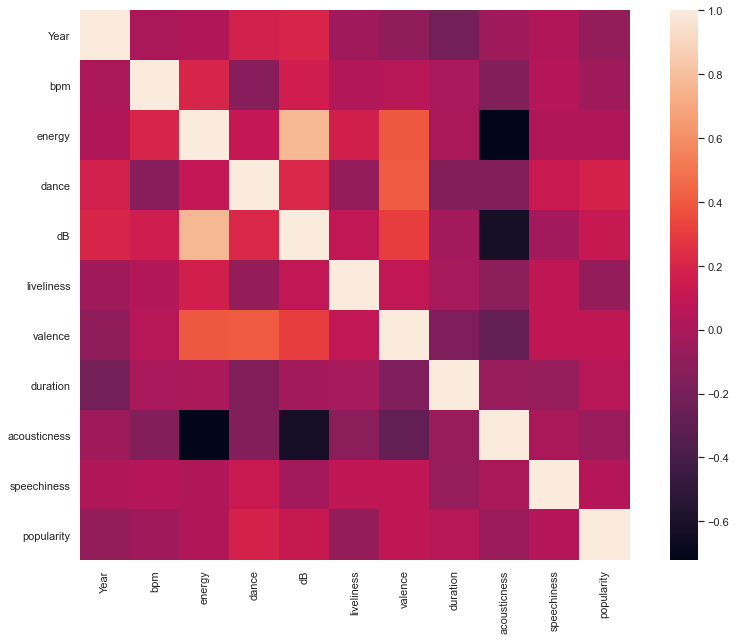

In [4]:
corr = df.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

In [8]:
print("Mean centred group profile:\n", PrintCombinedMeanPlaylist([df_BL, df_NL, df_TLC], 15))
print("\n\nMedian centered group profile:\n", PrintCombinedMedianPlaylist([df_BL, df_NL, df_TLC], 15))

Mean centred group profile:
                                Song                 Artist
735                     You Make Me                 Avicii
536   Favorite Sound - BRKLYN Remix                 Audien
1048                 Take Your Time               Sam Hunt
938                     Eyes On You             Chase Rice
935              Every Other Memory              Ryan Hurd
393              Somebody Loves You            White Panda
345     Losing You (feat. Mougleta)                offrami
1254                    Scar Tissue  Red Hot Chili Peppers
863                         Bad Day          Daniel Powter
487          Mean It (feat. Wrabel)              Cash Cash
489     Not Coming Home (feat. JRM)                 Matoma
570                    Push My Luck       The Chainsmokers
999                  Better in Time            Leona Lewis
714        Gold Roses (feat. Drake)              Rick Ross
55                    Cold Cold Man            Saint Motel


Median centered group pro

In [9]:
# Spotify defined "Happiest" songs
df.sort_values(by='valence', ascending=False).head(15)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
2943,Troublemaker (feat. Flo Rida),Olly Murs,dance pop,2012,106,86,76,-4,13,97,186,2,6,75
8,Hey Ya!,Outkast,atl hip hop,2006,80,95,71,-5,19,97,236,7,6,60
3212,Goodbye,Jagged Edge,atl hip hop,2001,130,73,82,-6,5,97,273,13,11,46
1586,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2017,122,81,87,-4,8,97,199,38,6,84
2573,Alfie's Song (Not So Typical Love Song),Bleachers,double drumming,2018,142,88,63,-6,35,97,181,4,8,47
3267,Start Me Up - Remastered,The Rolling Stones,album rock,1981,122,93,63,-4,9,97,213,4,4,79
2456,Chit Chat,Beach Weather,NaN,2016,142,98,51,-3,33,97,200,0,6,53
54,Pumped Up Kicks,Foster The People,indie pop,2011,128,71,73,-6,10,97,240,14,3,86
1053,That I Miss You,Vansire,bedroom pop,2018,115,57,78,-9,11,97,140,31,4,64
2280,Shine On Top,Surfaces,bedroom soul,2019,83,75,81,-5,14,97,145,14,17,60


In [10]:
# Spotify defined "energetic"
df.sort_values(by='energy', ascending=False).head(15)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
2728,That Don't Impress Me Much - Live,Shania Twain,canadian country,2015,125,100,67,-4,56,80,232,0,4,32
2734,(If You're Not In It For Love) I'm Outta Here!...,Shania Twain,canadian country,2015,120,99,58,-2,98,75,298,0,6,31
670,Cinema - Skrillex Remix,Benny Benassi,disco house,2011,145,99,64,-4,6,37,308,1,18,64
3074,Somebody Told Me,The Killers,modern rock,2004,138,99,51,-3,12,65,197,0,9,68
2456,Chit Chat,Beach Weather,NaN,2016,142,98,51,-3,33,97,200,0,6,53
3111,Love Drunk,Boys Like Girls,dance pop,2009,150,98,44,-3,16,41,227,0,14,66
3184,Everytime We Touch,Cascada,bubblegum dance,2006,142,98,63,-5,45,45,196,0,5,55
415,Crusade,Marshmello,brostep,2020,140,98,62,-1,33,49,171,3,8,61
2958,Promiscuous,Nelly Furtado,canadian latin,2006,114,98,80,-6,14,84,242,5,5,74
2303,Right Round (feat. Ke$ha),Flo Rida,dance pop,2009,129,98,45,-3,22,16,203,5,29,58


In [13]:
# Spotify defined "saddest" songs

df.sort_values(by='acousticness', ascending=True).head(25)

,Song,Artist,Genre,Year,bpm,energy,dance,dB,liveliness,valence,duration,acousticness,speechiness,popularity
1713,Drive By,Train,dance pop,2012,122,84,77,-3,8,72,196,0,3,77
355,Say My Name (feat. Zyra),ODESZA,chillwave,2014,115,75,75,-7,7,35,263,0,5,67
3256,Otherside,Red Hot Chili Peppers,alternative rock,1999,123,80,46,-3,8,51,255,0,6,80
3260,More Than a Feeling,Boston,album rock,1976,109,68,38,-8,5,29,285,0,3,80
2700,Let The Record Play,Moon Taxi,indie pop,2018,166,86,67,-4,17,78,189,0,8,37
348,If You’re Too Shy (Let Me Know) - Edit,The 1975,modern alternative rock,2020,126,81,65,-5,9,39,240,0,3,68
2699,Hard to Believe,HUNNY,indie pop,2017,147,81,58,-6,38,61,189,0,4,37
2690,Hallways,HUNNY,indie pop,2017,155,89,55,-7,16,87,192,0,4,38
2680,Siren,Wilderado,deep new americana,2018,140,68,47,-5,11,28,239,0,4,39
2674,One Life,Hedley,canadian pop,2011,162,89,59,-4,24,66,213,0,7,39
